In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import EngFormatter

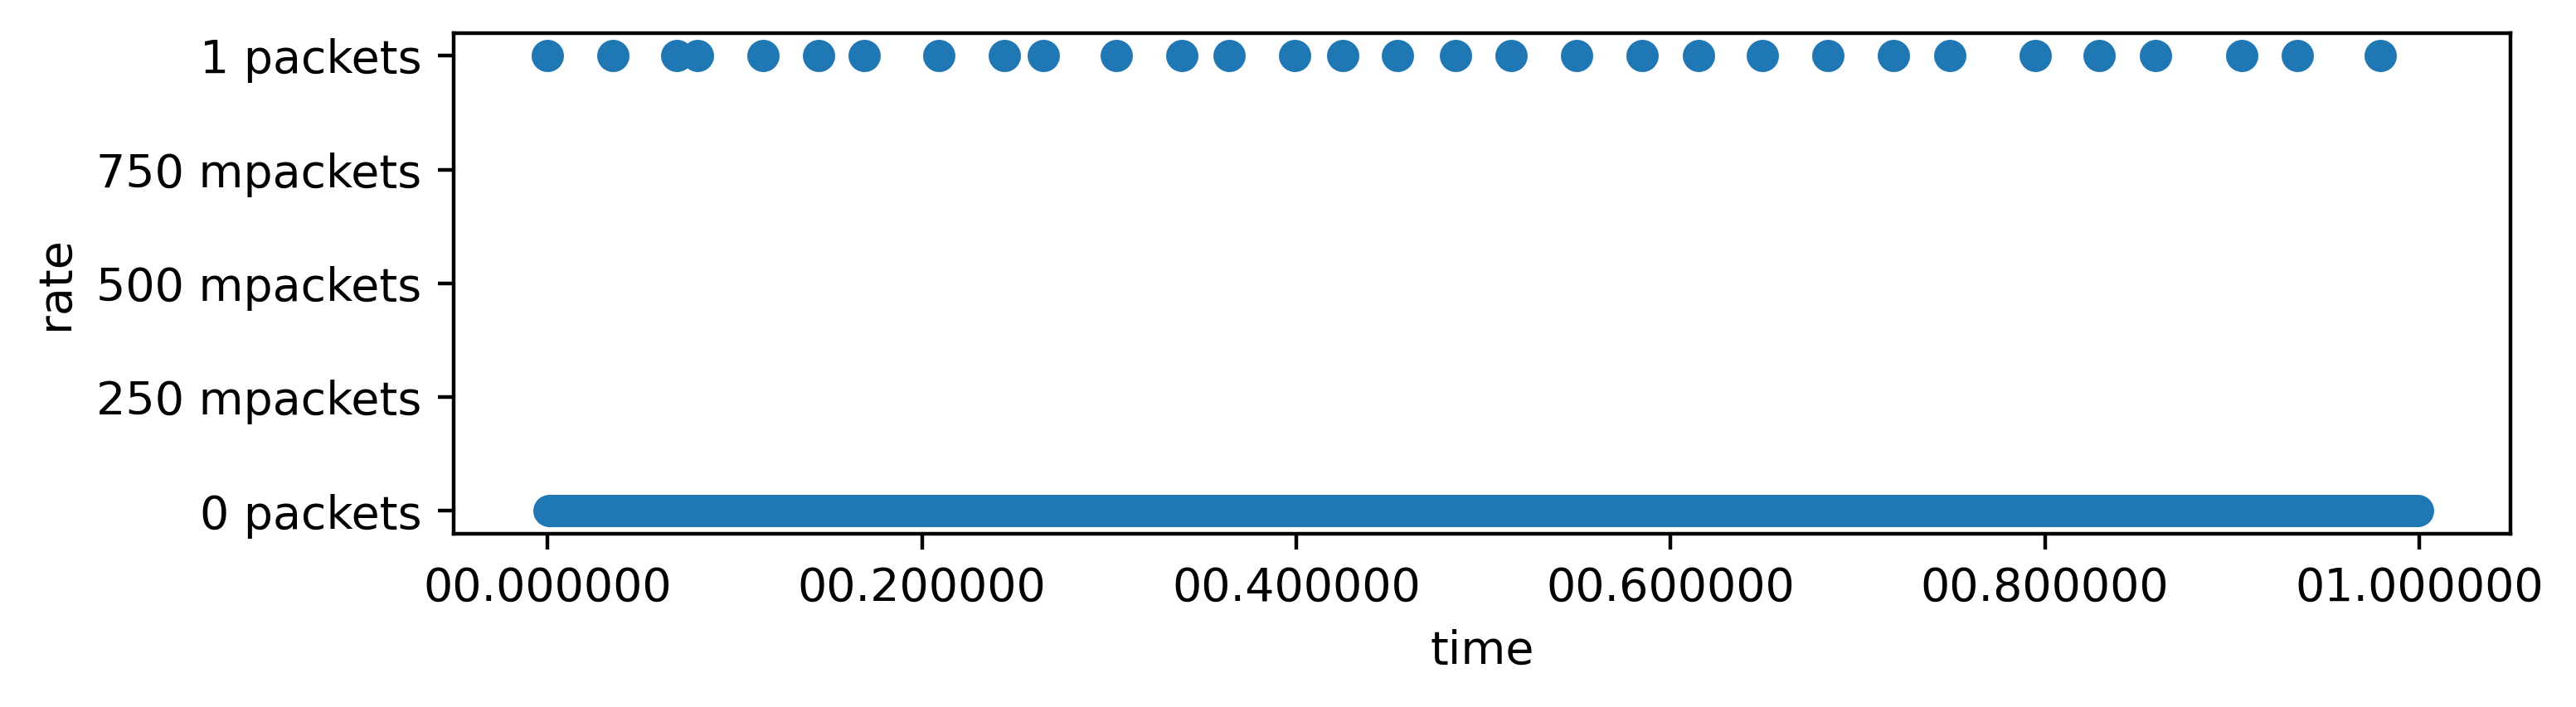

In [3]:
rtp_out_df = pd.read_csv(
    'output/a/send_log/rtp_out.log',
    index_col = 0,
    names = ['time', 'sent'],
    header = None,
    usecols = [0, 5],
#         dtype={'sent': 'bool'}
)
rtp_out_df['sent'] = rtp_out_df['sent'].apply(lambda x: 1)
rtp_out_df.index = pd.to_datetime(rtp_out_df.index - rtp_out_df.index[0], unit='ms')
rtp_out_df = rtp_out_df.resample('1ms').sum()

rtp_out_df = rtp_out_df.head(1000)

fig, ax = plt.subplots(figsize=(8,2), dpi=400)

plt.scatter(rtp_out_df.index, rtp_out_df['sent'])
plt.xlabel('time')
plt.ylabel('rate')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%S.%f"))
ax.yaxis.set_major_formatter(EngFormatter(unit='packets'))

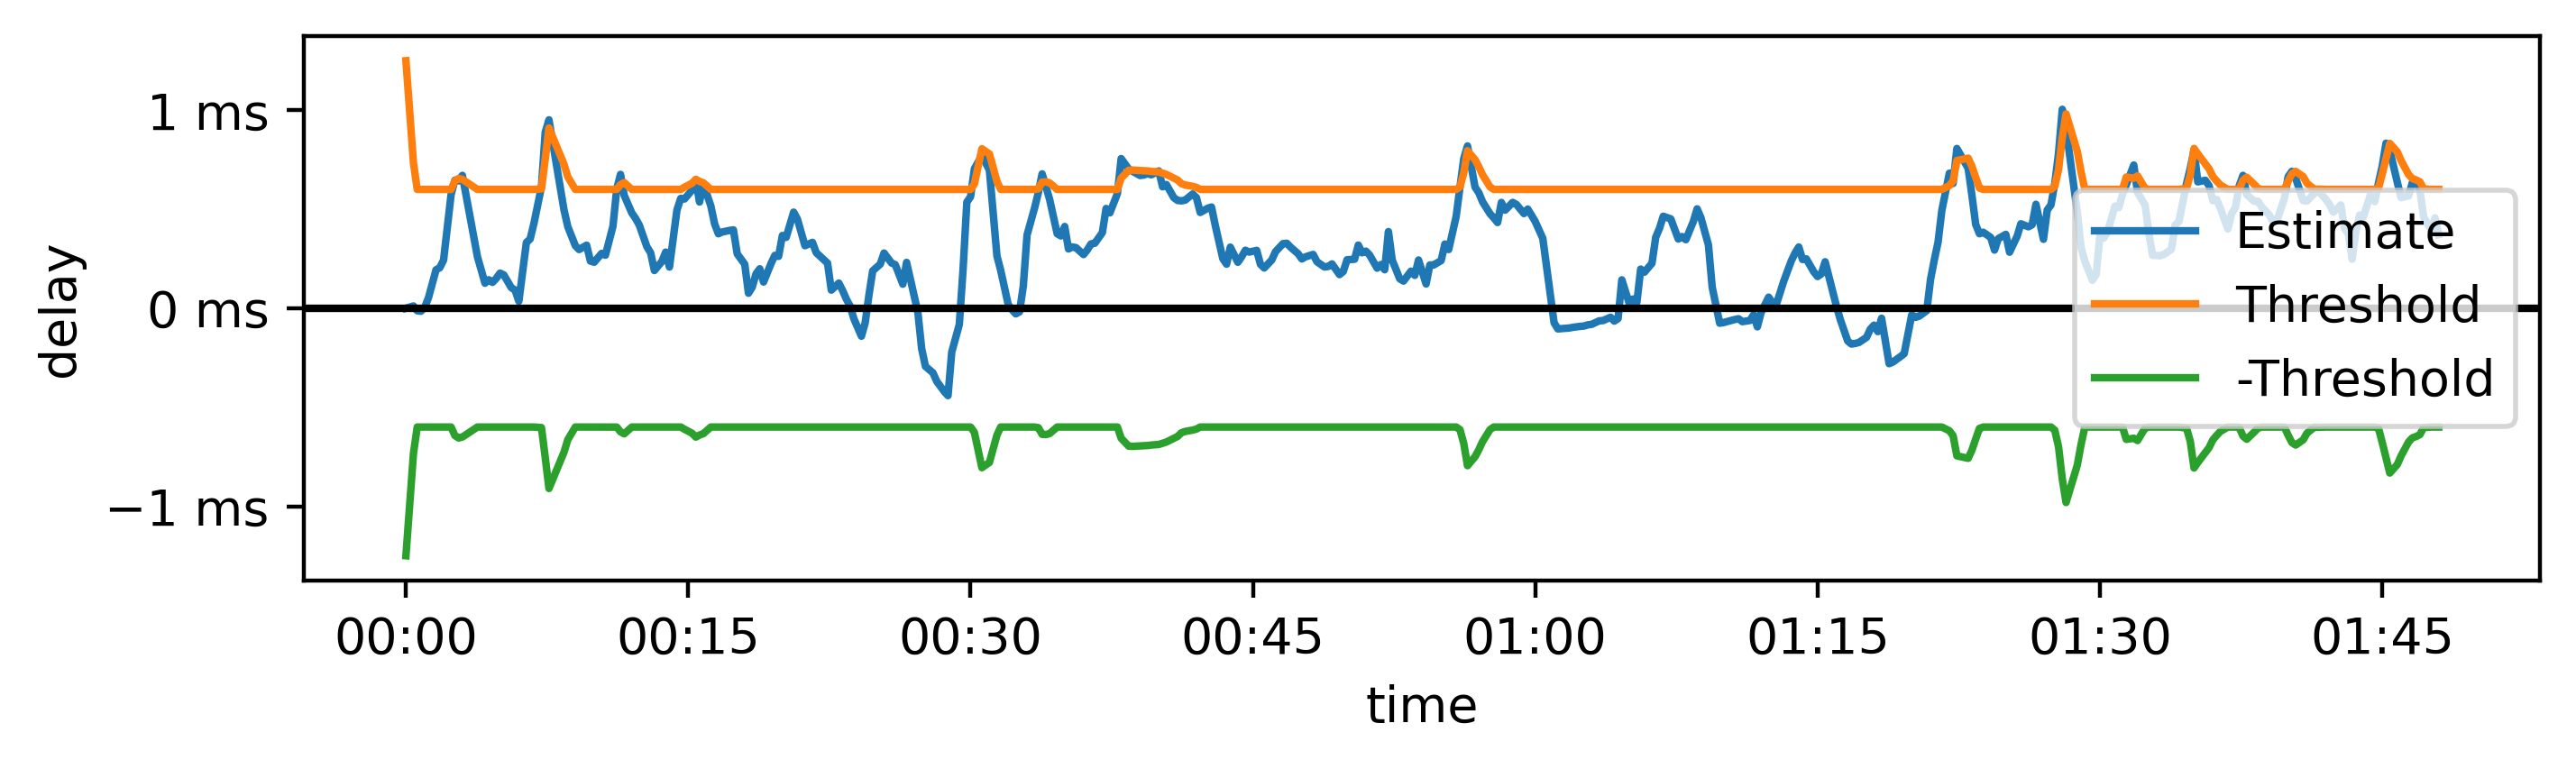

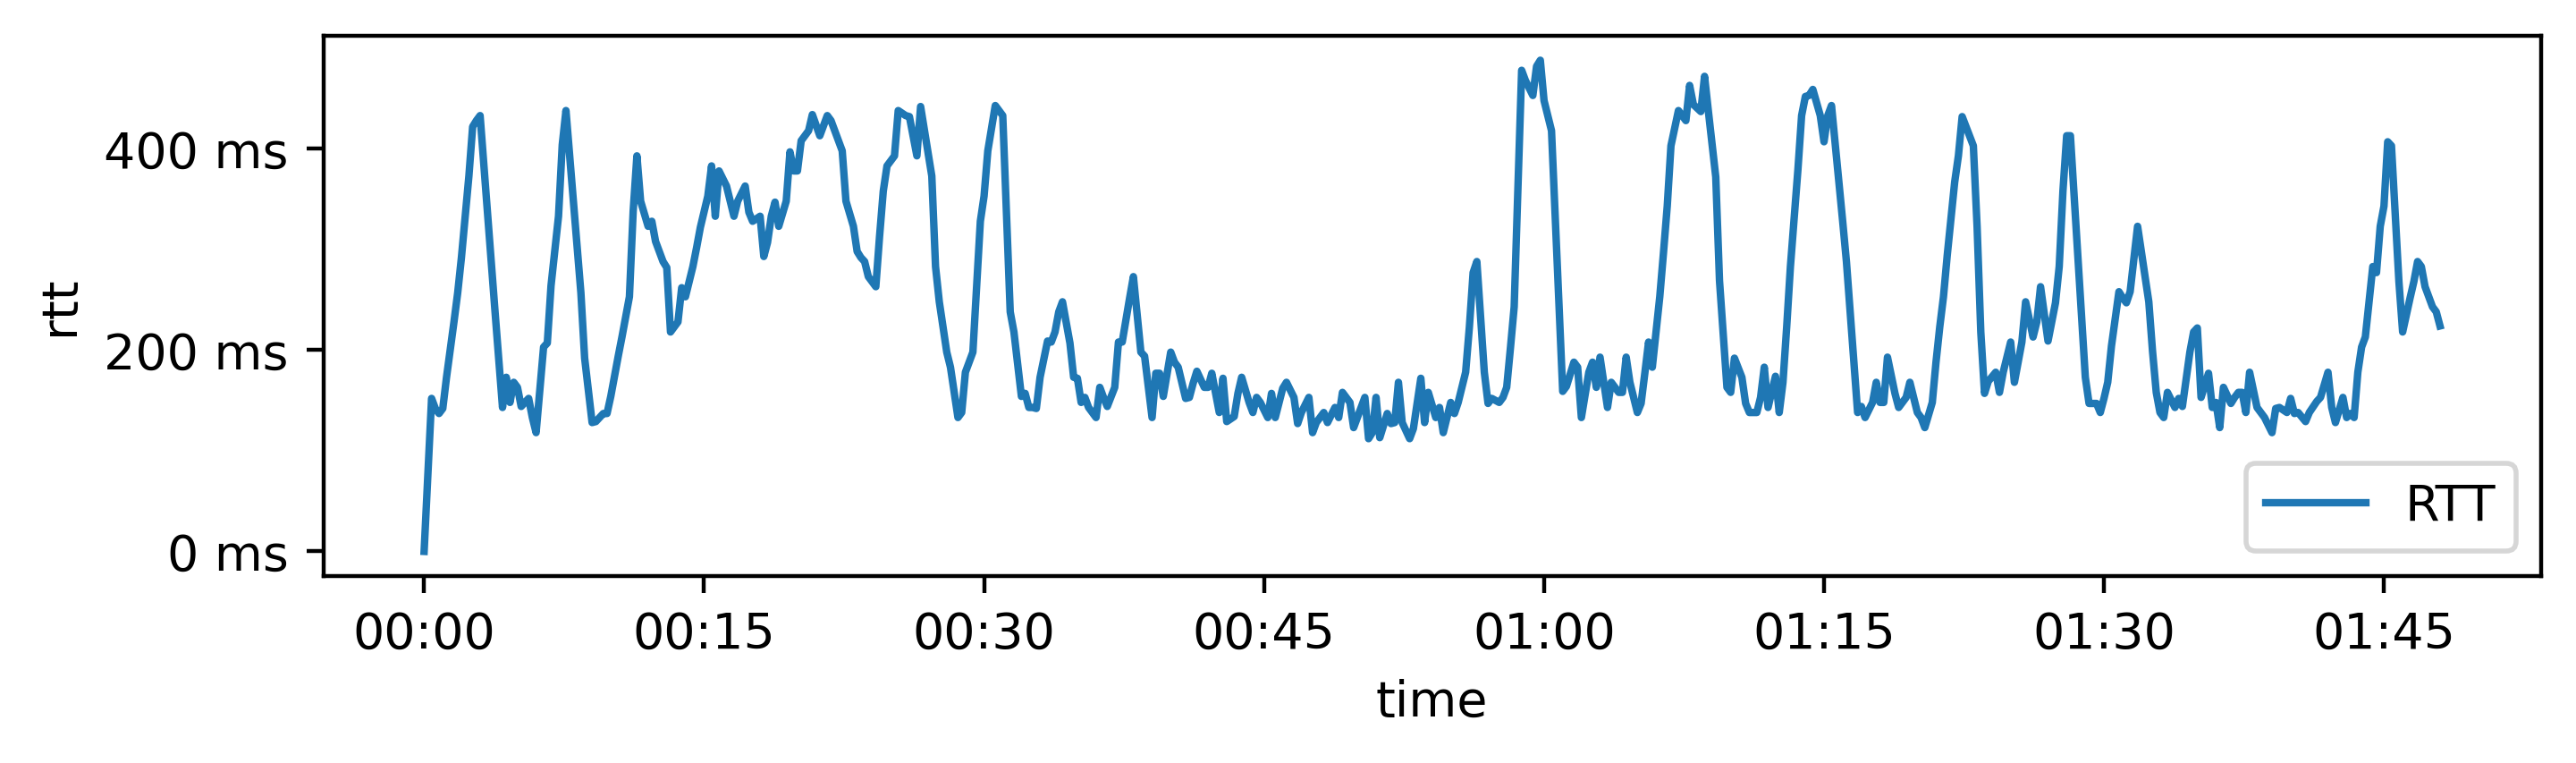

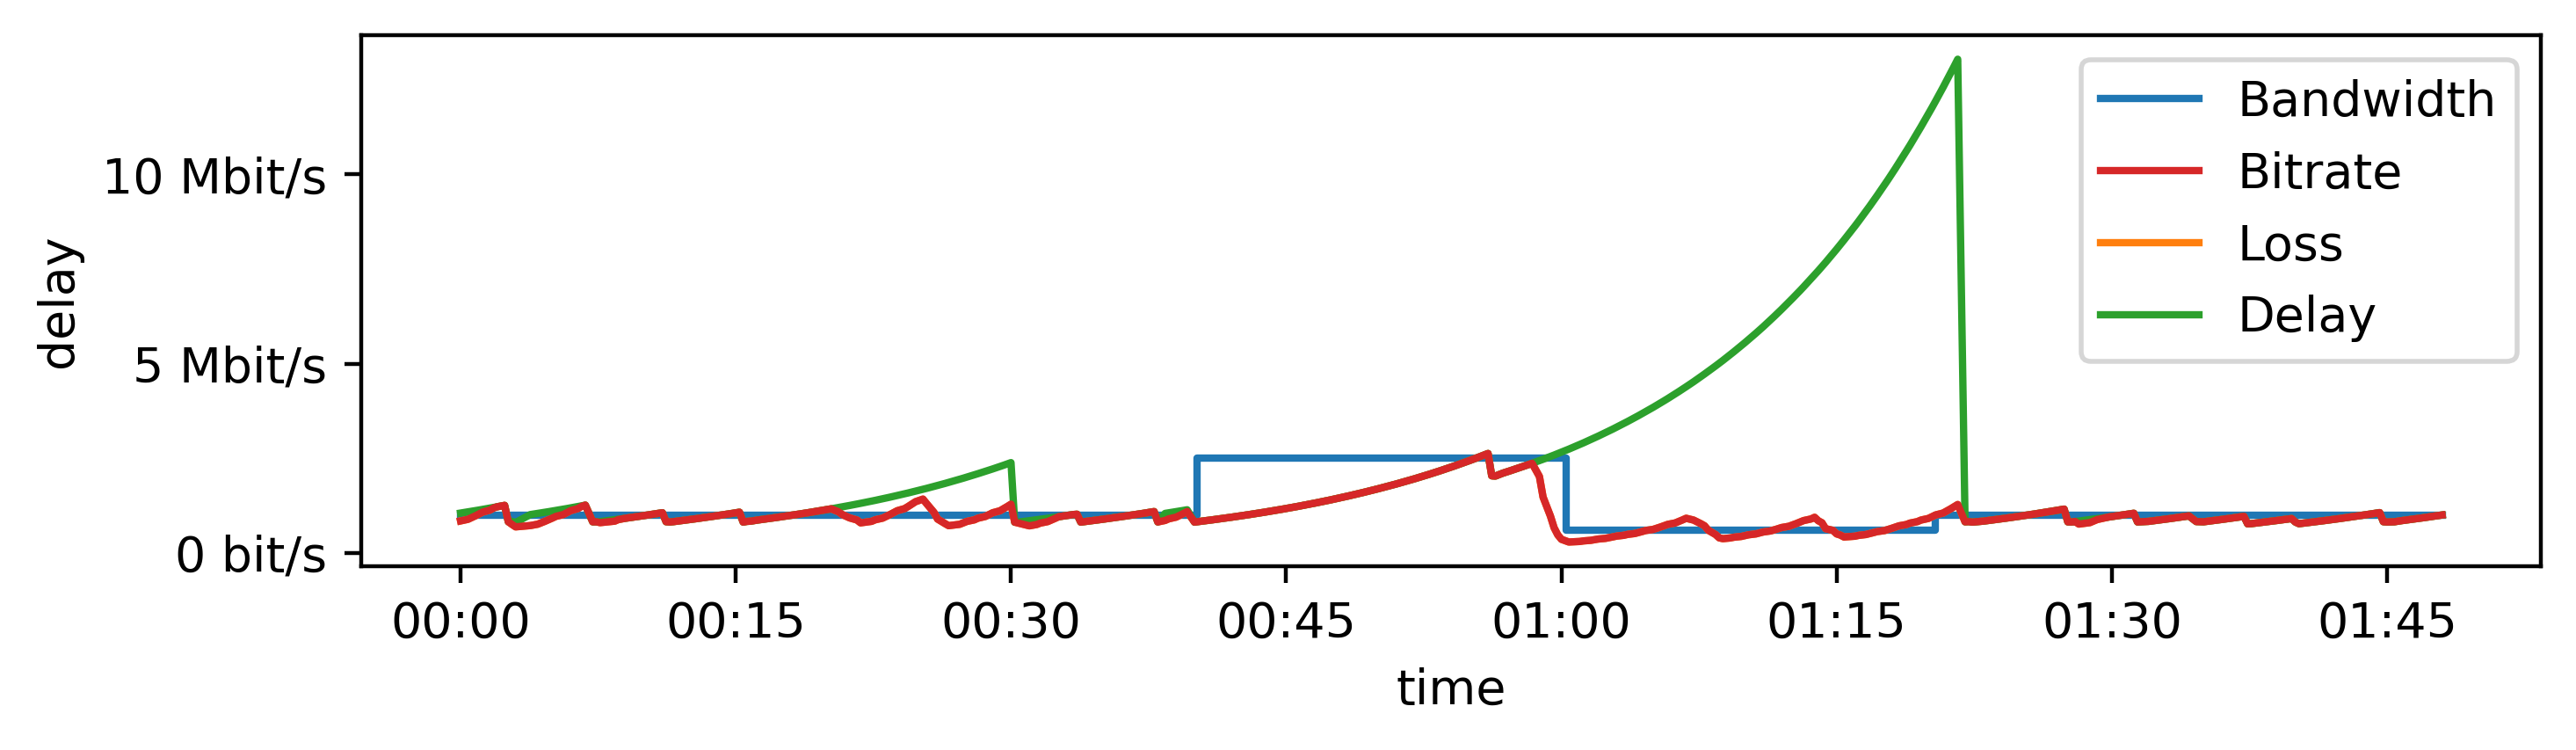

In [42]:
df = pd.read_csv(
    'output/a/send_log/cc.log',
    index_col = 0,
    names = ['time', 'bitrate', 'loss', 'delay', 'estimate', 'threshold', 'rtt'],
    header = None,
    usecols = [0, 1, 2, 3, 4, 5, 6],
)
df.index = pd.to_datetime(df.index - df.index[0], unit='ms')

fig, ax = plt.subplots(figsize=(8,2), dpi=400)

l0, = ax.plot(df.index, df['estimate'], label='Estimate')
l1, = ax.plot(df.index, df['threshold'], label='Threshold')
l2, = ax.plot(df.index, -df['threshold'], label='-Threshold')

ax.axhline(y=0, color='k')

plt.xlabel('time')
plt.ylabel('delay')
ax.legend(handles=[l0, l1, l2])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
ax.yaxis.set_major_formatter(EngFormatter(unit='ms'))

fig, ax = plt.subplots(figsize=(8,2), dpi=400)

l0, = ax.plot(df.index, df['rtt'], label='RTT')

plt.xlabel('time')
plt.ylabel('rtt')
ax.legend(handles=[l0])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
ax.yaxis.set_major_formatter(EngFormatter(unit='ms'))


lr_df = pd.read_csv(
    'output/leftrouter.log',
    index_col = 0,
    names = ['time', 'bandwidth'],
    header = None,
    usecols = [0, 1],
)
lr_df.index = pd.to_datetime(lr_df.index - lr_df.index[0], unit='ms')

cc_df = pd.read_csv(
    'output/a/send_log/cc.log',
    index_col = 0,
    names = ['time', 'target', 'loss', 'delay'],
    header = None,
    usecols = [0, 1, 2, 3],
)
cc_df.index = pd.to_datetime(cc_df.index - cc_df.index[0], unit='ms')
cc_df = cc_df[cc_df['target'] > 0]

lr_last = lr_df.iloc[[-1]]
lr_df = lr_df.append(lr_last)
as_list = lr_df.index.tolist()
as_list[-1] = cc_df.index.max()
lr_df.index = as_list

fig, ax = plt.subplots(figsize=(8,2), dpi=400)
l0, = ax.step(lr_df.index, lr_df.values, where='post', label='Bandwidth')
l2, = ax.plot(df.index, cc_df['loss'], label='Loss')
l3, = ax.plot(df.index, cc_df['delay'], label='Delay')
l1, = ax.plot(df.index, cc_df['target'], label='Bitrate')

plt.xlabel('time')
plt.ylabel('delay')
ax.legend(handles=[l0, l1, l2, l3])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
ax.yaxis.set_major_formatter(EngFormatter(unit='bit/s'))

In [30]:
df = pd.read_csv(
    'output/a/send_log/delay_cc.log',
    index_col = 0,
    names = ['time', 'measurement', 'estimate', 'rtt', 'state'],
    header = None,
    usecols = [0, 1, 2, 3, 4],
)
df.index = pd.to_datetime(df.index - df.index[0], unit='ms')

df = df.head(10000)

fig, ax = plt.subplots(figsize=(8,2), dpi=400)

l0, = ax.plot(df.index, df['measurement'], label='measurement')
# l1, = ax.plot(df.index, df['estimate'], label='estimate')
l2, = ax.plot(df.index, df['rtt'], label='rtt')
# l3, = ax.plot(df.index, df['state'], label='state')

plt.xlabel('time')
plt.ylabel('delay')
ax.legend(handles=[l0, l1, l2, l3])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%M:%S"))
ax.yaxis.set_major_formatter(EngFormatter(unit='ms'))

FileNotFoundError: [Errno 2] No such file or directory: 'output/a/send_log/delay_cc.log'